In [1]:
#import numpy and pandas
import numpy as np 
import pandas as pd 

In [6]:
#import visualization libraries and set %matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
#read in csv
df = pd.read_csv('911.csv')

In [5]:
#check the .info() of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
#check the head
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
#what are the top 5 zipcodes for 911 calls
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [9]:
#what are the top 5 townships (twp) for 911 calls?
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [10]:
#how many unique title codes in the 'title' column?
df['title'].nunique()

110

In [12]:
#Use .apply() with a lambda function to create a new column called 'reason' that contains the first part of the 'reasons/departments' column
x = df['title'].iloc[0]

In [14]:
x.split(':')[0]

'EMS'

In [15]:
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])

In [16]:
#how frequent are the different reasons for EMS being called?
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

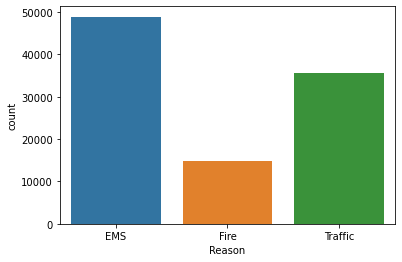

In [17]:
#use Seaborn to create a countplot of 911 calls by Reason
sns.countplot(x=df['Reason'], data=df)

In [20]:
#what is the data type of the objects in the timeStamp column?
type(df['timeStamp'].iloc[0])

str

In [23]:
#use pd.to_datetime to convert the column from strings to DateTime objects
df['timeStamp']=pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
#you will now be able to grab specific attributes from Datetime object by call them. For example:
time = df['timeStamp'].iloc[0]
time.hour 

17

In [25]:
time

Timestamp('2015-12-10 17:40:00')

In [26]:
#make a new column that has all of the hours in the column
df['Hour']= df['timeStamp'].apply(lambda time: time.hour)

In [28]:
#make a new column that has all of the months in the column
df['Month']= df['timeStamp'].apply(lambda time: time.month)

#make a new column that has all of the days of the week in the column
df['Day of Week']= df['timeStamp'].apply(lambda time: time.dayofweek)

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [30]:
#dictionary that maps the actual string names to the day of the week
dmap = {0: 'Mon', 1:'Tue', 2:'Wed', 3: 'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [31]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [32]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


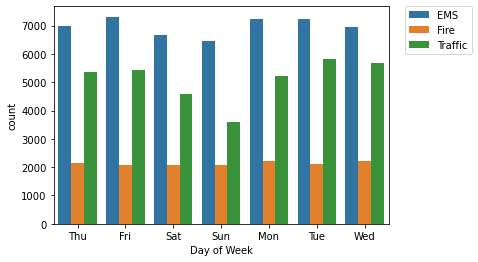

In [35]:
#use seaborn to create a countplot of the day of the week column with the hue based off of the reason column
sns.countplot(x=df['Day of Week'], data = df, hue=df['Reason'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

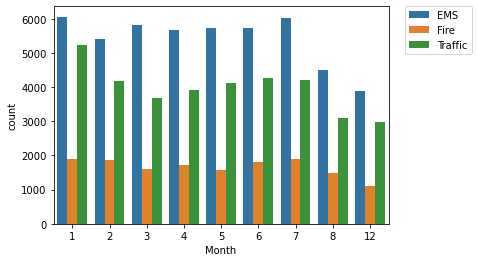

In [36]:
#use seaborn to create a countplot of the month column with the hue based off of the reason column
sns.countplot(x=df['Month'], data = df, hue=df['Reason'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [37]:
#for some reason, months 9, 10, 11 are missing. Need to use pandas to make them show up
#use groupby to aggregate the data
byMonth = df.groupby('Month').count()

In [38]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

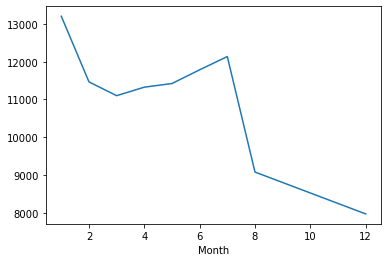

In [39]:
#create a simple plot off of the byMonth dataframe that shows the count of calls per month
byMonth['lat'].plot()

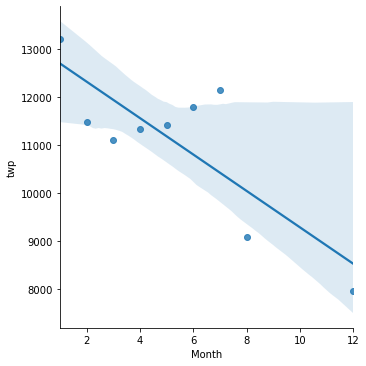

In [40]:
#use seaborn's lmplot() to create a linear fit on the number of calls per month
#reset the index to month. Which means that the indexes will be based off of month
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())